# Script Contents
### .01 Import Libraries
### .02 Import Data
### .03 Wrangling Data
### .04 Cleaning Data
### .05 Creating a Choropleth Map
### .06 Discussing Results

## .01 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Propting matplotlib visuals to appear in the notebook 
%matplotlib inline

## .02 Import Data

In [17]:
# Create a path to my project folder
path = r"C:\Users\jacks\Portuguese Real Estate Analysis"

In [18]:
# Import real estate data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'portugal_housing_cleaned.pkl'))

In [19]:
# Import Portuguese regions .json file
portugal_regions = os.path.join(path, '02 Data', 'Original Data', 'pt.json')

#### Portuguese geosjson file sourced from <a href="https://simplemaps.com/gis/country/pt">Simple Maps</a>

## .03 Wrangling Data
### My goal is ensure that the name values in the json file match the district names in my real estate data

In [22]:
# Look at the JSON file contents
f = open(os.path.join(path, '02 Data', 'Original Data', 'pt.json'))
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'geometry': {'type': 'Polygon', 'coordinates': [[[-7.225878380701713, 38.76613370353641], [-7.270430054175913, 38.73750743207381], [-7.272187048105726, 38.73373490596376], [-7.280713661978741, 38.72042830778601], [-7.284072630695091, 38.71324530342198], [-7.290945592747684, 38.67908709646059], [-7.292960978729428, 38.65627209504071], [-7.2924958893734075, 38.64611763792054], [-7.290945598878629, 38.63815953924463], [-7.286036340432655, 38.6319067651132], [-7.279421752844586, 38.628909399506774], [-7.273530641148015, 38.62539543924956], [-7.270430052165592, 38.61769556483735], [-7.275856079612726, 38.60382048477888], [-7.317713992746901, 38.556252448211325], [-7.335800737027124, 38.50586770427805], [-7.345619267895993, 38.49413740927303], [-7.3340954141219115, 38.48101134285753], [-7.335180622966465, 38.46943590410519], [-7.34484411753739, 38.45832554544315], [-7.359210166912185, 38.4463624910657], [-7.345515904926965, 38.440962073254624], [-7.31714554315365, 38.42458065016267], [-7.21

In [23]:
# Trying to open JSON file with correct accents
with open((os.path.join(path, '02 Data', 'Original Data', 'pt.json')), 'r', encoding='utf-8') as file:
    data = json.load(file)

print(data)

{'type': 'FeatureCollection', 'features': [{'geometry': {'type': 'Polygon', 'coordinates': [[[-7.225878380701713, 38.76613370353641], [-7.270430054175913, 38.73750743207381], [-7.272187048105726, 38.73373490596376], [-7.280713661978741, 38.72042830778601], [-7.284072630695091, 38.71324530342198], [-7.290945592747684, 38.67908709646059], [-7.292960978729428, 38.65627209504071], [-7.2924958893734075, 38.64611763792054], [-7.290945598878629, 38.63815953924463], [-7.286036340432655, 38.6319067651132], [-7.279421752844586, 38.628909399506774], [-7.273530641148015, 38.62539543924956], [-7.270430052165592, 38.61769556483735], [-7.275856079612726, 38.60382048477888], [-7.317713992746901, 38.556252448211325], [-7.335800737027124, 38.50586770427805], [-7.345619267895993, 38.49413740927303], [-7.3340954141219115, 38.48101134285753], [-7.335180622966465, 38.46943590410519], [-7.34484411753739, 38.45832554544315], [-7.359210166912185, 38.4463624910657], [-7.345515904926965, 38.440962073254624], [-7

In [24]:
# Import Portuguese regions .json file using uft-8 encoding
portugal_regions_file = os.path.join(path, '02 Data', 'Original Data', 'pt.json')

with open(portugal_regions_file, 'r', encoding='utf-8') as f:
    portugal_regions = json.load(f)

In [25]:
# Reminder of the df contents
df.head()

,Price,District,City,Town,Type,EnergyCertificate,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
0,250000,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,1,True,1992,114,2,1,0,114,2
1,9500,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,0,False,1990,27,3,2,0,27,1
2,580000,Faro,Vila do Bispo,Budens,Apartment,D,1,True,2003,84,2,1,0,84,2
3,350000,Faro,Portimão,Portimão,Apartment,C,0,False,1985,68,2,1,0,68,1
4,175000,Faro,Faro,Faro (Sé e São Pedro),House,NC,0,False,1950,78,4,2,0,78,2


In [26]:
# Viewing unique values in the district column
df['District'].unique()

array(['Faro', 'Vila Real', 'Porto', 'Lisboa', 'Guarda', 'Viseu',
       'Coimbra', 'Leiria', 'Castelo Branco', 'Ilha Terceira', 'Beja',
       'Setúbal', 'Évora', 'Santarém', 'Aveiro', 'Braga',
       'Ilha de São Miguel', 'Portalegre', 'Bragança', 'Viana do Castelo',
       'Ilha da Madeira', 'Ilha de Santa Maria', 'Ilha de Porto Santo',
       'Ilha de São Jorge', 'Z - Fora de Portugal'], dtype=object)

In [27]:
# Changing island names in the district column to fit into a single district/region
df['District'] = df['District'].replace({'Ilha Terceira' : 'Azores', 'Ilha de São Miguel' : 'Azores', 'Ilha da Madeira' : 'Madeira', 'Ilha de Santa Maria' : 'Azores', 'Ilha de Porto Santo' : 'Madeira', 'Ilha de São Jorge' : 'Azores'})

In [28]:
df['District'].unique()

array(['Faro', 'Vila Real', 'Porto', 'Lisboa', 'Guarda', 'Viseu',
       'Coimbra', 'Leiria', 'Castelo Branco', 'Azores', 'Beja', 'Setúbal',
       'Évora', 'Santarém', 'Aveiro', 'Braga', 'Portalegre', 'Bragança',
       'Viana do Castelo', 'Madeira', 'Z - Fora de Portugal'],
      dtype=object)

In [29]:
# Z - Fora de Portugal translates to an area outside of Portugal
# Checking to see how often this value occures in the district column
z_df = df[df['District'] == 'Z - Fora de Portugal']

In [30]:
z_df

,Price,District,City,Town,Type,EnergyCertificate,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
43192,265000,Z - Fora de Portugal,Brasil,Brasil,House,NC,3,True,2004,130,2,2,0,130,3
43200,320000,Z - Fora de Portugal,Brasil,Brasil,House,NC,1,True,2023,600,3,2,0,215,3
43209,175000,Z - Fora de Portugal,Brasil,Brasil,House,NC,0,True,1995,101,3,2,0,101,2
43236,385000,Z - Fora de Portugal,Brasil,Brasil,House,NC,1,True,1983,138,3,2,0,112,2
69506,600000,Z - Fora de Portugal,Brasil,Brasil,House,NC,0,True,1988,89,3,2,0,89,2
69507,1215000,Z - Fora de Portugal,Brasil,Brasil,House,NC,0,True,1992,89,4,2,1,89,3
69508,1330000,Z - Fora de Portugal,Brasil,Brasil,House,NC,0,True,1995,169,4,3,1,169,4
69509,1270000,Z - Fora de Portugal,Brasil,Brasil,House,NC,0,True,1993,168,5,3,1,168,4


In [31]:
# Dropping occurences of Z - Fora de Portuga
df = df[df['District'] != 'Z - Fora de Portugal']

In [32]:
df['District'].unique()

array(['Faro', 'Vila Real', 'Porto', 'Lisboa', 'Guarda', 'Viseu',
       'Coimbra', 'Leiria', 'Castelo Branco', 'Azores', 'Beja', 'Setúbal',
       'Évora', 'Santarém', 'Aveiro', 'Braga', 'Portalegre', 'Bragança',
       'Viana do Castelo', 'Madeira'], dtype=object)

In [47]:
# Export cleaned data
df.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'port_cleaned_regions.xlsx'))

## .04 Cleaning Data

<Axes: xlabel='District', ylabel='Count'>

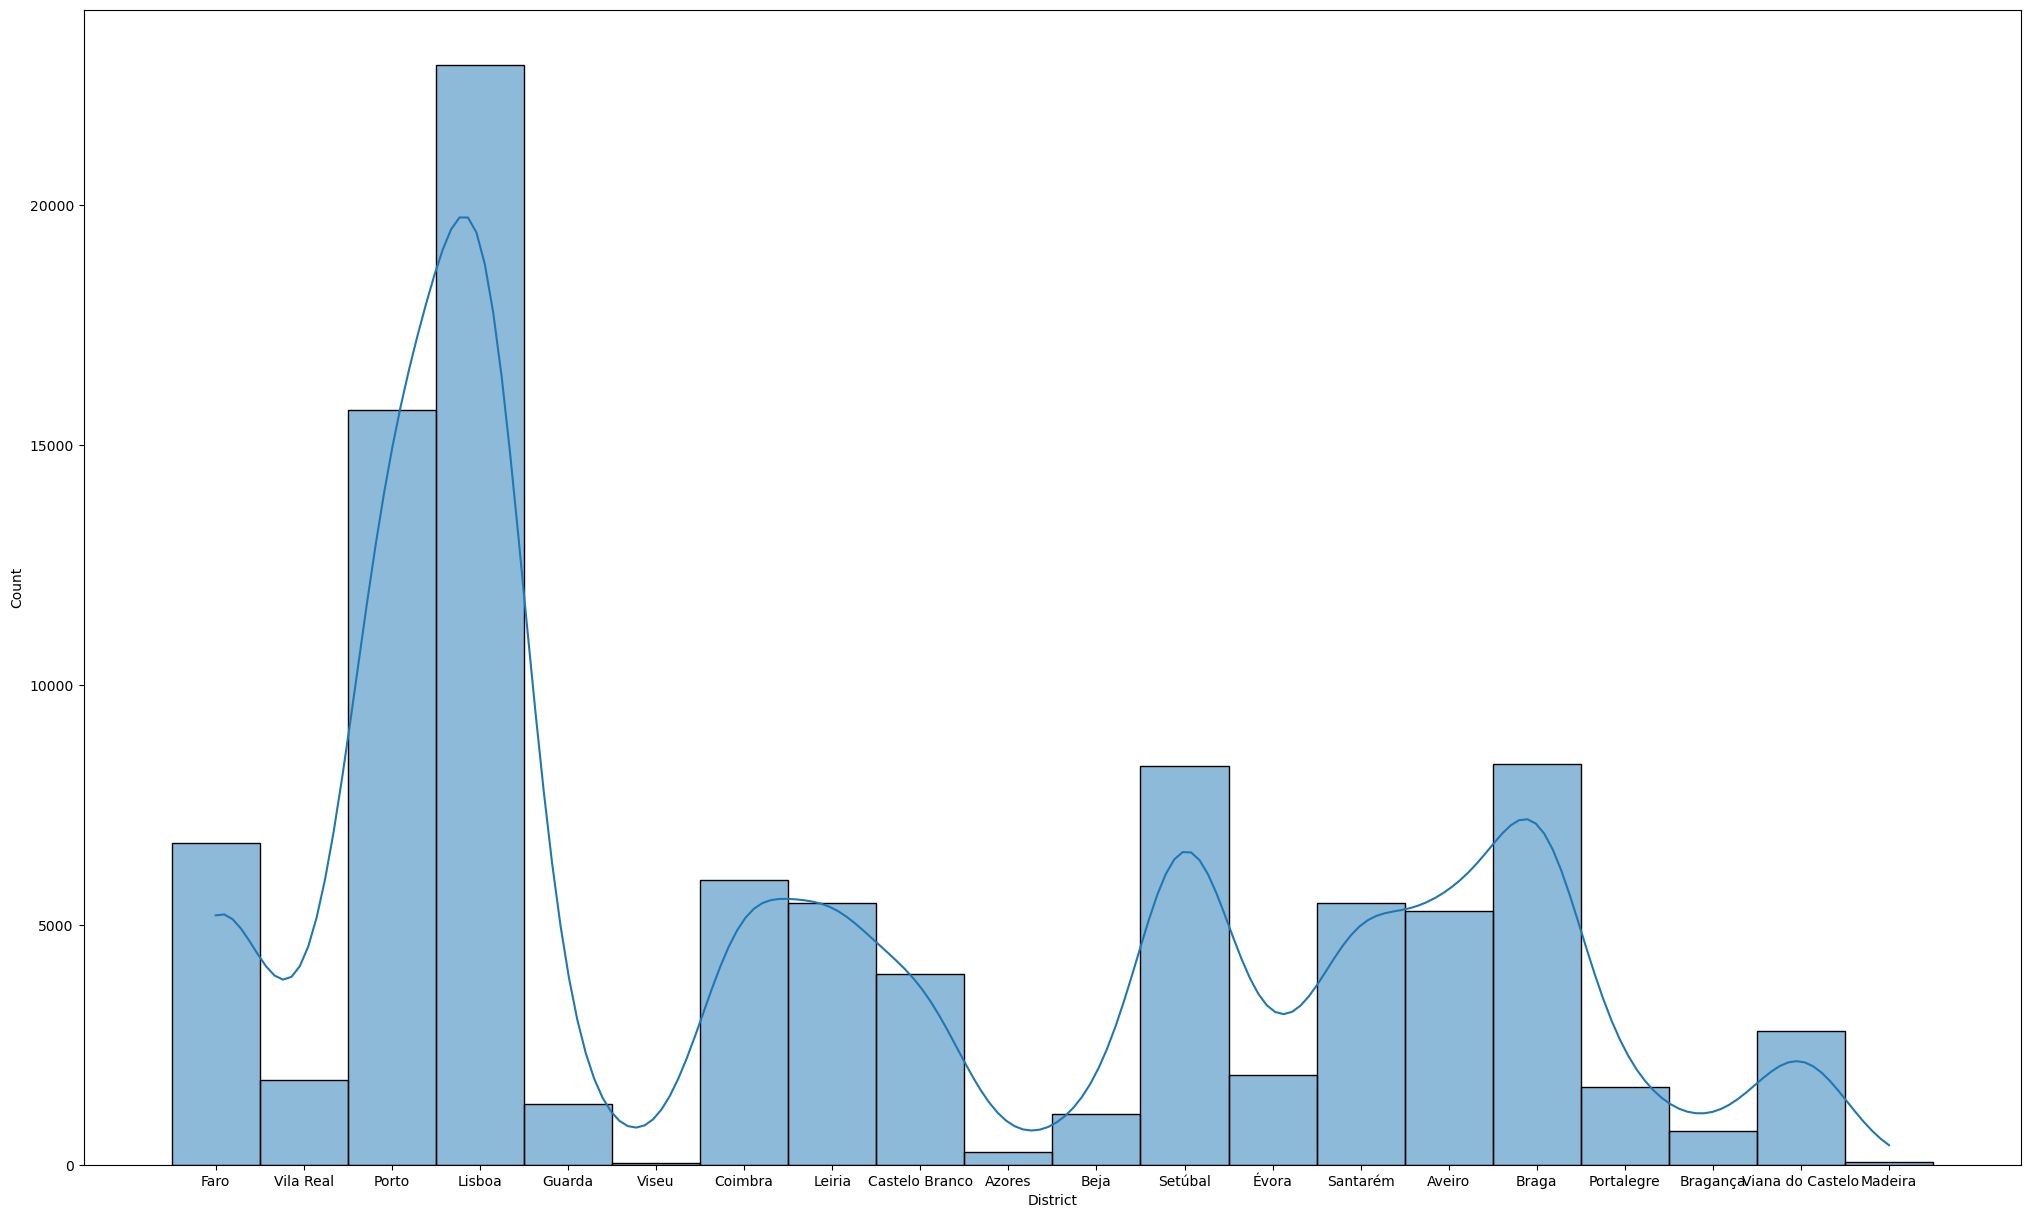

In [286]:
# PLotting histogram of Districts
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))
sns.histplot(df['District'], bins=20, kde=True)

<Axes: xlabel='Price', ylabel='Count'>

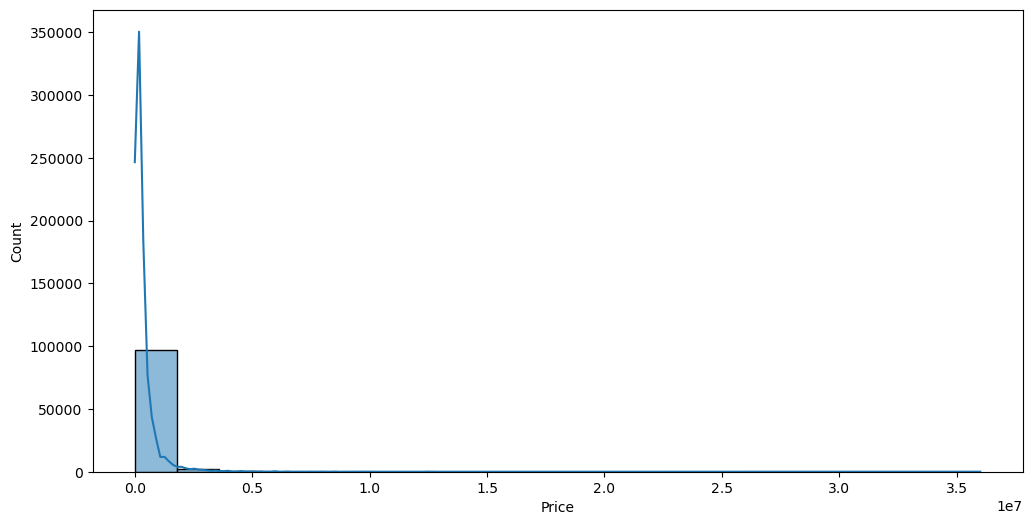

In [287]:
# PLotting histogram of Prices
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=20, kde=True)

In [288]:
df['Price'].describe()

count    9.946800e+04
mean     3.654293e+05
std      6.453433e+05
min      5.000000e+02
25%      8.500000e+04
50%      2.100000e+05
75%      3.959700e+05
max      3.600000e+07
Name: Price, dtype: float64

In [289]:
# Creating a df subset where values in the price column are under 10 million euros
# At 10 million euros, higher priced properties are still included but extremely high prices are excluded
df_cleaned_prices = df[df['Price'] <= 10000000]

In [290]:
# Checking the new prices column
df_cleaned_prices['Price'].describe()

count    9.942700e+04
mean     3.592226e+05
std      5.567346e+05
min      5.000000e+02
25%      8.500000e+04
50%      2.100000e+05
75%      3.950000e+05
max      1.000000e+07
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

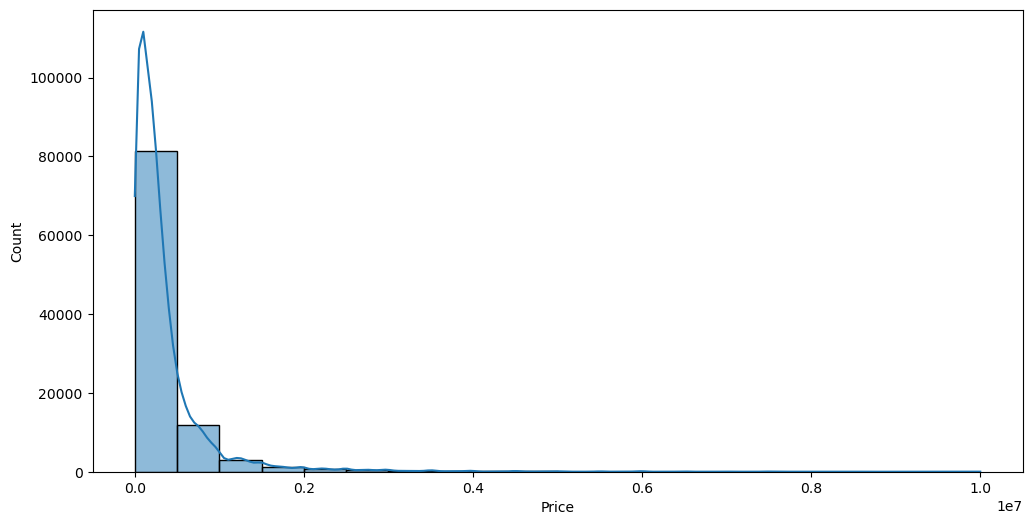

In [291]:
# PLotting histogram of updated prices
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned_prices['Price'], bins=20, kde=True)

#### Though there are still appear to be very few high values compared to the cluster of lower values in the Price column, there are less extremely high values that would skew the average of each district's prices. 

## .05 Creating a Choropleth Map 

In [294]:
# Creating a data subset of average prices per district to use for mapping
data_to_plot = df_cleaned_prices.groupby('District')['Price'].mean()

In [295]:
# Checking out the subset
data_to_plot.head()

District
Aveiro      272668.242332
Azores      309209.050909
Beja        326977.800190
Braga       252983.597533
Bragança    250860.376081
Name: Price, dtype: float64

In [296]:
# Convert the Series to a DataFrame with two columns
data_to_plot = data_to_plot.reset_index()

# Rename the columns for clarity
data_to_plot.columns = ['District', 'Average Price']

In [297]:
data_to_plot.head()

,District,Average Price
0,Aveiro,272668.242332
1,Azores,309209.050909
2,Beja,326977.800190
3,Braga,252983.597533
4,Bragança,250860.376081


In [298]:
# Rounding prices
data_to_plot['Average Price'] = data_to_plot['Average Price'].round()

In [299]:
data_to_plot.head()

,District,Average Price
0,Aveiro,272668.0
1,Azores,309209.0
2,Beja,326978.0
3,Braga,252984.0
4,Bragança,250860.0


In [300]:
# Setup a folium map so that both the Portugal mainland and island districts can be seen
map = folium.Map(location = [37, -15], zoom_start = 4.5)

# Creating a cloropleth map of the average prices per district in Portugal
folium.Choropleth(
    geo_data = portugal_regions, 
    data = data_to_plot,
    columns = ['District', 'Average Price'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrRd', fill_opacity=0.8, line_opacity=0.5,
    legend_name = "Average Price in Euros").add_to(map)
folium.LayerControl().add_to(map)

map

In [301]:
map.save(os.path.join(path, '04 Analysis','Visualizations','plot_data.html'))

## .06 Discuss Results
### Does the analysis answer any of your existing research questions?
> Yes, this map clearly shows that certain regions of Portugal have higher price averages for properties, indicating the location does influe real estate price. The district with the highest price average, Lisboa, contains the capitol city of Lisbon. It makes sense that this highly populated coastal area would have higher priced properties
### Does the analysis lead you to any new research questions?
> Yes, this map does lead me to wonder why certain disctricts have higher price averages than others. As previously mentioned, I think population density and relevance of a location, such as being a capitol city with lots of business/work opportunities or being a popular tourist destination, can have an impact on price. A more specific question might be how does population influence real estate price? 